# Uploading libraries and packages

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from numpy import unravel_index

* Plots, tabs

In [3]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from IPython.display import Image
import seaborn as sns
from IPython.display import HTML, display
import tabulate

* Resampling

In [4]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

* Metrics

In [5]:
from scipy.stats import chi2_contingency, ttest_ind

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle

from decimal import Decimal
import time

* Standardization, pca anlalysis

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* Cross-Validation (Avoiding overfitting)

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

* Train and Test

In [8]:
from sklearn.model_selection import train_test_split

* Neural Network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import utils
from sklearn.preprocessing import LabelEncoder

* KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

* Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

* SVM

In [12]:
from sklearn.svm import SVC

* Decision Tree/Random forest

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# DATA PREPROCESSING

Loading data

In [14]:
dataset = pd.read_csv('..//data//cust_history_10M_tool.csv')

In [15]:
nclient, observations =dataset.shape

In [16]:
dataset.head()

EMI_TENURE              CREDIT_HISTORY TRANSACTION_CATEGORY  \
0          77  EXISTING CREDITS PAID BACK            EDUCATION   
1         119  EXISTING CREDITS PAID BACK          ELECTRONICS   
2          84  EXISTING CREDITS PAID BACK            FURNITURE   
3         119               DELAY IN PAST            FURNITURE   
4         105               DELAY IN PAST            FURNITURE   

   TRANSACTION_AMOUNT      ACCOUNT_TYPE  ACCOUNT_AGE STATE IS_URBAN  \
0               27630      UNKNOWN/NONE  above 7 YRS    CT       NO   
1               31314  above 1000 K USD   4 to 7 YRS    CT      YES   
2               27630  above 1000 K USD   4 to 7 YRS    PA       NO   
3               33156  above 1000 K USD   up to 1 YR    PA      YES   
4               23946  above 1000 K USD   up to 1 YR    CT       NO   

  IS_STATE_BORDER HAS_CO_APPLICANT HAS_GUARANTOR OWN_REAL_ESTATE  \
0             YES              YES           YES              NO   
1             YES              YES           YES              NO   
2              NO              YES           YES             YES   
3              NO              YES            NO              NO   
4             YES              YES           YES             YES   

  OTHER_INSTALMENT_PLAN OWN_RESIDENCE  NUMBER_CREDITS  RFM_SCORE OWN_CAR  \
0                   YES            NO               0          4      NO   
1                    NO           YES               0          3     YES   
2                    NO           YES               0          3     YES   
3                    NO           YES               0          3      NO   
4                   YES            NO               0          3     YES   

  SHIP_INTERNATIONAL IS_DEFAULT  
0                 NO         No  
1                YES         No  
2                YES         No  
3                 NO        Yes  
4                YES         No

* Creating a Dataframe to cuantify the number of nominal variables in each column

In [17]:
dataset.dtypes

EMI_TENURE                int64
CREDIT_HISTORY           object
TRANSACTION_CATEGORY     object
TRANSACTION_AMOUNT        int64
ACCOUNT_TYPE             object
ACCOUNT_AGE              object
STATE                    object
IS_URBAN                 object
IS_STATE_BORDER          object
HAS_CO_APPLICANT         object
HAS_GUARANTOR            object
OWN_REAL_ESTATE          object
OTHER_INSTALMENT_PLAN    object
OWN_RESIDENCE            object
NUMBER_CREDITS            int64
RFM_SCORE                 int64
OWN_CAR                  object
SHIP_INTERNATIONAL       object
IS_DEFAULT               object
dtype: object

In [18]:
n_non_num2={i:list(dataset[i].value_counts().index) for i in dataset}

In [19]:
element_dict = {}

for column in dataset:
    if (dataset[column].dtype!=np.int64):
        string ='non-num elem: '
        
    else:
        string = 'Numeric elem: '
    
    n_num_elem = dataset[column].value_counts().index
    string = string + str(len(n_num_elem))
    
    element_dict[column] = n_num_elem.insert(0,string)

In [20]:
QC_values =pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in element_dict.items() ]))
QC_values.fillna('', inplace=True)
QC_values

EMI_TENURE              CREDIT_HISTORY TRANSACTION_CATEGORY  \
0   Numeric elem: 26             non-num elem: 5      non-num elem: 7   
1                 77  EXISTING CREDITS PAID BACK            FURNITURE   
2                 91               DELAY IN PAST            EDUCATION   
3                 84       ALL CREDITS PAID BACK          ELECTRONICS   
4                 98            CRITICAL ACCOUNT           RETRAINING   
5                105                  NONE TAKEN             USED CAR   
6                112                                            OTHER   
7                 70                                          NEW CAR   
8                119                                                    
9                 63                                                    
10                56                                                    
11               126                                                    
12               133                                                    
13                49                                                    
14                42                                                    
15               140                                                    
16               147                                                    
17                35                                                    
18                28                                                    
19               154                                                    
20               161                                                    
21                21                                                    
22               168                                                    
23                14                                                    
24                 7                                                    
25               175                                                    
26                 0                                                    
27                                                                      
28                                                                      

   TRANSACTION_AMOUNT       ACCOUNT_TYPE      ACCOUNT_AGE            STATE  \
0    Numeric elem: 28    non-num elem: 5  non-num elem: 5  non-num elem: 4   
1               29472   above 1000 K USD       up to 1 YR               CT   
2               27630   100 to 500 K USD      above 7 YRS               PA   
3               25788       UNKNOWN/NONE       4 to 7 YRS               NY   
4               23946  500 to 1000 K USD              TBD               NJ   
5               22104    up to 100 K USD       1 to 4 YRS                    
6               31314                                                        
7               20262                                                        
8               18420                                                        
9               33156                                                        
10              16578                                                        
11              34998                                                        
12              36840                                                        
13              14736                                                        
14              12894                                                        
15              38682                                                        
16              11052                                                        
17              40524                                                        
18              42366                                                        
19               9210                                                        
20              44208                                                        
21               7368                                                        
22              46050    

# TARGET LABEL= 'IS DEFAULT'. UNBALANCED DATA WILL BIAS PREDICTIONS

* Cheking whether data is balanced

In [21]:
dataset['IS_DEFAULT'].value_counts()

No     7000000
Yes    3000000
Name: IS_DEFAULT, dtype: int64

Data is unbalanced: 70% No, 30% Yes. It needs to be balanced before ML, otherwise predictions will be bias towards No default

# CONVERTING CATEGORICAL VARIABLES TO NUMERICAL
# YES = 1
#  NO   = 0

In [22]:
# Changing Variable name for is_defaulert
dataset.loc[dataset['RFM_SCORE'] == 1, 'RFM_SCORE'] = '1'
dataset.loc[dataset['RFM_SCORE'] == 2, 'RFM_SCORE'] = '2'
dataset.loc[dataset['RFM_SCORE'] == 3, 'RFM_SCORE'] = '3'
dataset.loc[dataset['RFM_SCORE'] == 4, 'RFM_SCORE'] = '4'
dataset['RFM_SCORE'].astype('category')
dataset['RFM_SCORE'].dtype

dtype('O')

In [23]:
X_for_dummies = dataset.drop(['IS_DEFAULT'],axis=1)
#Y_for_dummies = dataset[['IS_DEFAULT']]
Y_targte_pre  = dataset['IS_DEFAULT']

In [24]:
categorical_var = ['CREDIT_HISTORY', 'TRANSACTION_CATEGORY', 'ACCOUNT_TYPE', 'ACCOUNT_AGE',
                      'STATE', 'IS_URBAN', 'IS_STATE_BORDER', 'HAS_CO_APPLICANT', 'HAS_GUARANTOR',
                      'OWN_REAL_ESTATE', 'OTHER_INSTALMENT_PLAN',
                      'OWN_RESIDENCE', 'RFM_SCORE', 'OWN_CAR', 'SHIP_INTERNATIONAL']

X_num = pd.get_dummies(X_for_dummies, categorical_var)
X_num.head()

EMI_TENURE  TRANSACTION_AMOUNT  NUMBER_CREDITS  \
0          77               27630               0   
1         119               31314               0   
2          84               27630               0   
3         119               33156               0   
4         105               23946               0   

   CREDIT_HISTORY_ALL CREDITS PAID BACK  CREDIT_HISTORY_CRITICAL ACCOUNT  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   

   CREDIT_HISTORY_DELAY IN PAST  CREDIT_HISTORY_EXISTING CREDITS PAID BACK  \
0                             0                                          1   
1                             0                                          1   
2                             0                                          1   
3                             1                                          0   
4                             1                                          0   

   CREDIT_HISTORY_NONE TAKEN  TRANSACTION_CATEGORY_EDUCATION  \
0                          0                               1   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               0   

   TRANSACTION_CATEGORY_ELECTRONICS  ...  OWN_RESIDENCE_NO  OWN_RESIDENCE_YES  \
0                                 0  ...                 1                  0   
1                                 1  ...                 0                  1   
2                                 0  ...                 0                  1   
3                                 0  ...                 0                  1   
4                                 0  ...                 1                  0   

   RFM_SCORE_1  RFM_SCORE_2  RFM_SCORE_3  RFM_SCORE_4  OWN_CAR_NO  \
0            0            0            0            1           1   
1            0            0            1            0           0   
2            0            0            1            0           0   
3            0            0            1            0           1   
4            0            0            1            0           0   

   OWN_CAR_YES  SHIP_INTERNATIONAL_NO  SHIP_INTERNATIONAL_YES  
0            0                      1                       0  
1            1                      0                       1  
2            1                      0                       1  
3            0                      1                       0  
4            1                      0                       1  

[5 rows x 51 columns]

* Merging numerical dataset 

 * Given that data is unbalanced, it needs to bebalanced before proceed to predictions

# BALANCING DATA

In [25]:
dataset['IS_DEFAULT'].value_counts()

No     7000000
Yes    3000000
Name: IS_DEFAULT, dtype: int64

* Oversampling 'Yes' to 'No' (30K to 70K)

In [26]:
#sm         = SMOTE()
#X_os, Y_os = sm.fit_resample(X_num, Y_targte_pre)
#Y_targte_pre.value_counts()

# tAKING LONG TIME

* Downsampling 'No' to 'Yes' (7m to 30m)

In [27]:
sm = RandomUnderSampler()

In [28]:
X_balanced, Y_balanced = sm.fit_resample(X_num, Y_targte_pre)

* Data is now balanced

In [29]:
Y_balanced.value_counts()

No     3000000
Yes    3000000
Name: IS_DEFAULT, dtype: int64

* Extracting 20% of data for a final test which is the blind data that is not going to be taken into account during training.
* X_blind, Y_blind will never be used for training and test, but for blind QC

* UNDERSAMPLIUG THE DATA TO RUN PROPERLY IN LAPTOPS

In [30]:
#X_features_0, X_blind_features_0, y_target_0, y_blind_target_0 = train_test_split (X_balanced, Y_balanced, test_size=0.05, random_state=10, stratify=Y_balanced)
X_features, X_blind_features, y_target, y_blind_target = train_test_split (X_balanced, Y_balanced, train_size=10000, test_size=2000, random_state=10, stratify=Y_balanced)

In [31]:
print(y_blind_target.value_counts())
print(y_target.value_counts())
print('--------------------')
print(X_features.shape)
print(y_target.shape)

No     1000
Yes    1000
Name: IS_DEFAULT, dtype: int64
No     5000
Yes    5000
Name: IS_DEFAULT, dtype: int64
--------------------
(10000, 51)
(10000,)


# STANDARDIZATION

In [32]:
# STANDARDIZATION
stdsc = StandardScaler()

X_features_std = stdsc.fit_transform(X_features)

# blind data
X_blind_features_std = stdsc.fit_transform(X_blind_features)

# PCA ANALYSIS

* PCA allows to reduce the number of features (inputs) to train the model:
* Less components leads to a less complex model and less computatinal time

* Choosing the number of PCA components

In [33]:
pca   = PCA().fit(X_features_std .data)
cum_pca =np.cumsum(pca.explained_variance_ratio_)

In [34]:
X_features.shape

(10000, 51)

In [35]:
%matplotlib notebook

<IPython.core.display.Javascript object>


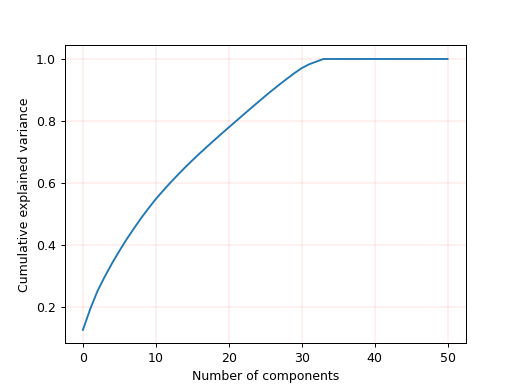

approx 90%:  0.8997726928331583
num of comp:  27


In [36]:
plt. figure(1)

plt.plot(cum_pca)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
plt.show()

idx = (np.abs(cum_pca  - .9)).argmin()
print('approx 90%: ', cum_pca[idx])
print('num of comp: ', idx + 1)

* First 28 components (out of 51) contain approx 90% of the variance

* PCA with 28 components

In [37]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
#n = 90
#pca = PCA(n/100)

## Fit the PCA on the training set
#pca.fit(X_features_std)

#print('To retain',n,'% of the variation, we needed',pca.n_components_,'components')

In [38]:
# PCA
pca = PCA(n_components = 28)

X_features_pca = pca.fit_transform(X_features_std)
X_features_pca.shape

(10000, 28)

In [39]:
pca_blind   = PCA().fit(X_blind_features_std .data)
X_blind_features_pca = pca.fit_transform(X_blind_features_std)
X_blind_features_pca.shape

(2000, 28)

In [40]:
#start = time.time()
#end = time.time()
#print('Train Time (seconds) of DT PCA:',end-start)

# ML

In [41]:
seed = 12345
np.random.seed(seed)

# DECISION TREE
### With— and without PCA

* Searching for the depth of the tree that returns the best model accuracy

<IPython.core.display.Javascript object>


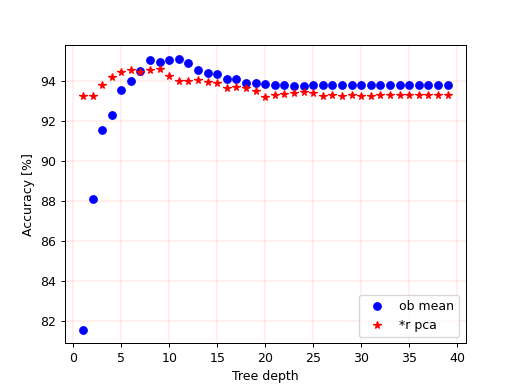

------------------------
depth:  1  mean:  81.58  mean_pca 93.28
depth:  2  mean:  88.14  mean_pca 93.28
depth:  3  mean:  91.55  mean_pca 93.82
depth:  4  mean:  92.32  mean_pca 94.2
depth:  5  mean:  93.58  mean_pca 94.48
depth:  6  mean:  94.01  mean_pca 94.58
depth:  7  mean:  94.52  mean_pca 94.47
depth:  8  mean:  95.09  mean_pca 94.59
depth:  9  mean:  94.97  mean_pca 94.62
depth:  10  mean:  95.06  mean_pca 94.25
depth:  11  mean:  95.12  mean_pca 94.0
depth:  12  mean:  94.92  mean_pca 94.01
depth:  13  mean:  94.56  mean_pca 94.08
depth:  14  mean:  94.4  mean_pca 93.98
depth:  15  mean:  94.38  mean_pca 93.92
depth:  16  mean:  94.14  mean_pca 93.67
depth:  17  mean:  94.1  mean_pca 93.73
depth:  18  mean:  93.9  mean_pca 93.66
depth:  19  mean:  93.91  mean_pca 93.5
depth:  20  mean:  93.88  mean_pca 93.24
depth:  21  mean:  93.83  mean_pca 93.34
depth:  22  mean:  93.82  mean_pca 93.39
depth:  23  mean:  93.79  mean_pca 93.42
depth:  24  mean:  93.79  mean_pca 93.45
depth:

In [42]:
plt.figure(2)

vals     = []
vals_pca = []


print('------------------------')
for i in range(1,40): 
    
    StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    
    # Without PCA
    tree     = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=1)
    #tree.fit(X_features, y_target)
    #y_pred = tree.predict(X_features)
    score = cross_val_score(tree, X_features, y_target, cv = StratKfold)
    mean  = round(score.mean()*100,2)
    
    # With PCA
    tree_pca = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=1)
    #tree_pca.fit(X_features_pca, y_target)
    #y_pred_pca = tree_pca.predict(X_features_pca)
    score_pca = cross_val_score(tree_pca, X_features_pca, y_target, cv = StratKfold)
    mean_pca  = round(score_pca.mean()*100,2)
    
    print('depth: ', i, ' mean: ', mean, ' mean_pca', mean_pca)
    
    plt.plot(i,mean, 'ob')
    plt.plot(i,mean_pca,'*r')
    
    vals.append(mean)
    vals_pca.append(mean_pca)

plt. grid(b = None, which = 'both', axis = 'both', color = 'r', linestyle = '-', linewidth = 0.1)
plt.xlabel('Tree depth')
plt.ylabel('Accuracy [%]')
plt.show()

plt.legend(['ob mean','*r pca'])

val, idx = max((val, idx) for (idx, val) in enumerate(vals))

val_pca, idx_pca = max((val_pca, idx_pca) for (idx_pca, val_pca) in enumerate(vals_pca))

print('###################')
print('Max depth without PCA: ',  idx+1, 'Accuracy: ',     val, '%')
print('Max depth with PCA: ', idx_pca+1, 'Accuracy: ', val_pca, '%')

* Defining the model with max depth and QC

In [43]:
# No PCA
tree   = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)

# PCA 
tree_pca   = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1)


# Evaluation procedure
kfold  = KFold(n_splits = 10, shuffle=True, random_state=seed)

# cross validation
score_tree  = cross_val_score(tree, X_features, y_target, cv=kfold)
mean_tree   = score_tree.mean()*100

score_tree_pca  = cross_val_score(tree_pca, X_features_pca, y_target, cv=kfold)
mean_tree_pca   = score_tree_pca.mean()*100


print('No   PCA. Mean accuracy is %.2f%% (std deviation %.2f%%)' % (score_tree.mean()*100, score_tree.std()*100)) 
print('With PCA. Mean accuracy is %.2f%% (std deviation %.2f%%)' % (score_tree_pca.mean()*100, score_tree_pca.std()*100)) 

No   PCA. Mean accuracy is 94.84% (std deviation 0.73%)
With PCA. Mean accuracy is 94.11% (std deviation 1.02%)


* 3 most imortant features (without PCA)

In [44]:
# Finding the 3 most imortant features
tree.fit(X_features, y_target)
importance  = tree.feature_importances_
column_names = X_features.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importances)):
    if ii <3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])

print('The 3 most important features without PCA in decision tree model are: ')
pd.DataFrame(important_features, columns=['Most important features NO PCA'])

The 3 most important features without PCA in decision tree model are: 


Most important features NO PCA
0                       STATE_PA
1         ACCOUNT_AGE_4 to 7 YRS
2               HAS_GUARANTOR_NO

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.958576 to fit



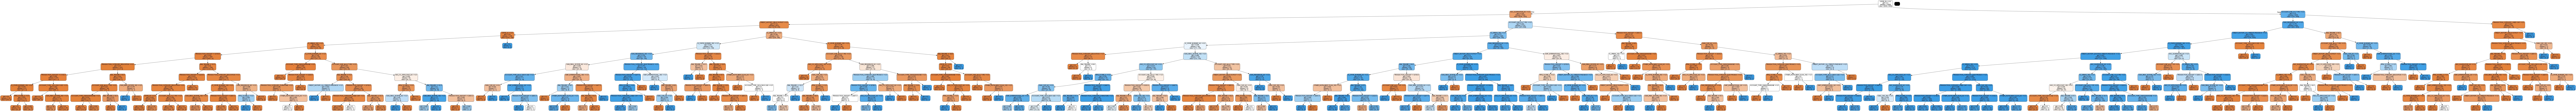

In [45]:
# plottig decision tree
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           out_file=None,
                           feature_names=list(X_features))

graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

from IPython.display import Image
#Image('tree.png', width=1000)

#plotting decision tree

#Image('tree.png', width=1000, high=1000)
Image('tree.png', width=3000)

In [46]:
#%reset_selective -f abc

In [47]:
#%reset_selective -f dataset_num

# RANDOM FOREST
###  without PCA

* converting column categorical to values
* YES = 1
* NO = 0

In [48]:
# Changing Variable name for is_defaulert
y_forest = np.where(y_target =='Yes',1,0)
y_forest = pd.DataFrame(data = y_forest, columns = ['IS_DEFAULT'])
y_forest.value_counts()

IS_DEFAULT
0             5000
1             5000
dtype: int64

* Defining the model (1000 trees)
* Criterion = "squared_error  --> mse
* Criterion = "absolute_error --> mae
* n_jobs = number of jobs to be parallelized, -1 for all 

* Model parameter tunning

In [49]:
n_estimators = [10, 100, 1000] # num of trees
max_features = ['auto', 'sqrt'] # both are the same e
max_depth    = [2,4]
min_samples_split = [2,5] # num samples to slit the node
bootstrapp   = [True, False] # num samples required at each leaf
random_state = [1]
n_jobs = [-1]

rfmodel_params = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'random_state' : random_state,
    'n_jobs' : n_jobs}

print (rfmodel_params)

{'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt'], 'random_state': [1], 'n_jobs': [-1]}


* Grid (Brute force)

In [50]:
#forest = RandomForestRegressor, multilabel
#forest = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', random_state = 1, n_jobs = -1)
#forest.fit(X_features, y_forest)

#forest = RandomForestClassifier()
#rf_Grid = GridSearchCV(estimator = forest, param_grid=rfmodel_params, cv=10, verbose=2, n_jobs=-1)

#rf_Grid.fit(X_features, y_forest)
#df_rf = pd.DataFrame(rf_Grid.cv_results_)

In [51]:
#dir(rf_Grid)

* Random Search (Less Brute force)

In [52]:
# Random Selection
from sklearn.model_selection import RandomizedSearchCV

forest =RandomForestClassifier()
rf_RandomGrid = RandomizedSearchCV(estimator = forest, 
                                   param_distributions=rfmodel_params, cv=10, verbose=2, 
                                   return_train_score=False,
                                   n_iter=3, n_jobs=-1)
rf_RandomGrid.fit(X_features, y_forest)
df_RandomGrid = pd.DataFrame(rf_RandomGrid.cv_results_)

df_RandomGrid[['param_n_estimators','params','mean_test_score']]

Fitting 10 folds for each of 3 candidates, totalling 30 fits


param_n_estimators                                             params  \
0               1000  {'random_state': 1, 'n_jobs': -1, 'n_estimator...   
1                 10  {'random_state': 1, 'n_jobs': -1, 'n_estimator...   
2                100  {'random_state': 1, 'n_jobs': -1, 'n_estimator...   

   mean_test_score  
0           0.9640  
1           0.9597  
2           0.9646

In [53]:
print('Best param: ',rf_RandomGrid.best_params_)

Best param:  {'random_state': 1, 'n_jobs': -1, 'n_estimators': 100, 'max_features': 'sqrt'}


* Selecting model parameter

In [54]:
forest = RandomForestClassifier(n_estimators = 1000, max_features = 'sqrt', random_state = 1, n_jobs = -1)

# Evaluation precedure
StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

# cross validation
score_forest  = cross_val_score(forest, X_features, y_forest, cv=StratKfold)
mean_forest   = score_forest.mean()*100


print('No   PCA. Mean accuracy is %.2f%% (std deviation %.2f%%)' % (score_forest.mean()*100, score_forest.std()*100)) 

No   PCA. Mean accuracy is 96.48% (std deviation 0.30%)


## KNN

* Searching  Model parameters with PCA

<IPython.core.display.Javascript object>


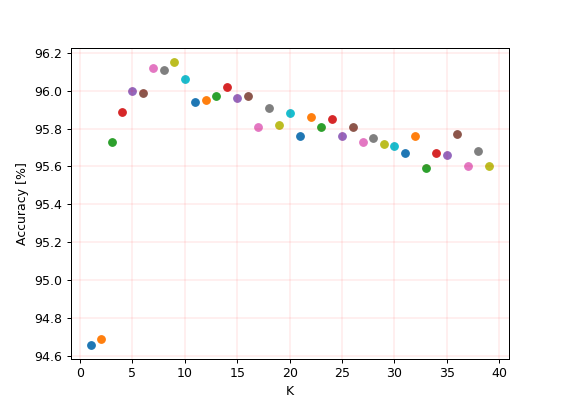

In [55]:
fig = plt.figure(11,figsize=(7, 5))

vals = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski')
    
    StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

    result_knn = cross_val_score(knn, X_features_pca, y_target, cv = StratKfold)
    mean_knn   = round(result_knn.mean()*100,2)
    vals.append(mean_knn)
    
    plt.scatter(i, mean_knn)

plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)
plt.xlabel('K')
plt.ylabel('Accuracy [%]')
plt.show()        

In [56]:
k_t = pd.DataFrame({'K' :  list(range(1, len(vals)+1)),
                   'Accuracy [%]' : vals})

k_t.set_index('K', inplace=True)

print(k_t)


val, idx = max((val, idx) for (idx, val) in enumerate(vals))
print('###################')
print('Max neighbor: ',idx+1, 'Accuracy: ',val,'%')

    Accuracy [%]
K               
1          94.66
2          94.69
3          95.73
4          95.89
5          96.00
6          95.99
7          96.12
8          96.11
9          96.15
10         96.06
11         95.94
12         95.95
13         95.97
14         96.02
15         95.96
16         95.97
17         95.81
18         95.91
19         95.82
20         95.88
21         95.76
22         95.86
23         95.81
24         95.85
25         95.76
26         95.81
27         95.73
28         95.75
29         95.72
30         95.71
31         95.67
32         95.76
33         95.59
34         95.67
35         95.66
36         95.77
37         95.60
38         95.68
39         95.60
###################
Max neighbor:  9 Accuracy:  96.15 %


* Selecting KNN model parameter

In [57]:
knn = KNeighborsClassifier(n_neighbors=10, p=12, metric='minkowski')

# Evaluation precedure
StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

# cross validation
score_knn  = cross_val_score(knn, X_features_pca, y_target, cv=StratKfold)
mean_knn   = score_knn.mean()*100

print('With PCA. Mean accuracy is %.2f%% (std deviation %.2f%%)' % (score_knn.mean()*100, score_knn.std()*100)) 

With PCA. Mean accuracy is 95.48% (std deviation 0.56%)


# LOGISTIC REGRESSION

In [58]:
'''
grid_values = {'penalty': ['l1','l2','elasticnet'], 
               'C': [0.001,0.01,0.1,1,10,100,1000], 
               'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'max_iter':[100, 1000, 5000]}

model_lr = GridSearchCV(lr, param_grid=grid_values)
'''

"\ngrid_values = {'penalty': ['l1','l2','elasticnet'], \n               'C': [0.001,0.01,0.1,1,10,100,1000], \n               'solver':['newton-cg','lbfgs','liblinear','sag','saga'],\n              'max_iter':[100, 1000, 5000]}\n\nmodel_lr = GridSearchCV(lr, param_grid=grid_values)\n"

* Defining the log space Lambda λ param

In [73]:
c_lambda = np.logspace(-1, 4, 6)
c_lambda

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

* Using PCA

<IPython.core.display.Javascript object>


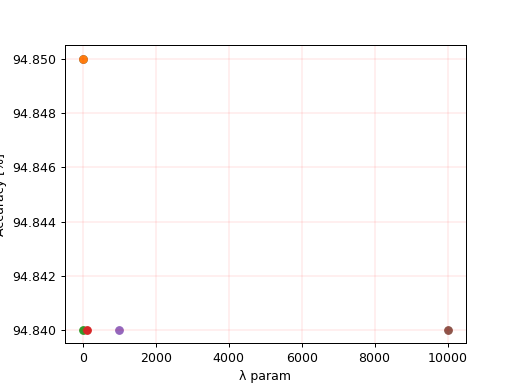

****************
    Lambda  Accuracy
0      0.1     94.85
1      1.0     94.85
2     10.0     94.84
3    100.0     94.84
4   1000.0     94.84
5  10000.0     94.84
[0.943 0.943 0.948 0.946 0.949 0.942 0.954 0.957 0.941 0.961]


In [74]:
plt.figure(12)

n=len(c_lambda)
vals = []
print('****************')
for lambda_v in c_lambda:
    
    lr = LogisticRegression(C=lambda_v, random_state=1)
    
    StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

    result_lr = cross_val_score(lr, X_features_pca, y_target, cv = StratKfold)
    
    mean_lr   = round(result_lr.mean()*100,4)
    vals.append(mean_lr)
    plt.scatter(lambda_v,mean_lr)
    
plt.show()
plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)

plt.xlabel('λ param')
plt.ylabel('Accuracy [%]')

Param0=pd.DataFrame(c_lambda, columns=['Lambda']) 
Param0['Accuracy']=vals
print(Param0)

val, idx = max((val, idx) for (idx, val) in enumerate(vals))

print(result_lr)

In [61]:
print('###################')
print('Optimal λ [C]: ',c_lambda[2], 'Accuracy: ',val,'%')

###################
Optimal λ [C]:  10.0 Accuracy:  94.85 %


* Defining LR model

In [62]:
c_lambda=10
lr = LogisticRegression(C=c_lambda, random_state=1)

# Cross validation
StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
score_lr = cross_val_score(lr, X_features_pca, y_target, cv=StratKfold)
mean_lr  = score_lr.mean()*100
print('Mean accuracy %.2f%% (std deviation %.2f%%)' % (score_lr.mean()*100, score_lr.std()*100))

Mean accuracy 94.84% (std deviation 0.65%)


# SVM

* Defining the log space Lambda λ param

In [63]:
gamma_list  = [0.1, 1.0, 10.0, 100.0] #np.logspace(-4, 2,7)
c_list = [0.01, 1, 5, 10, 20, 50, 100, 1000]

ng=len(gamma_list)
nc=len(c_list)

print(list(gamma_list))
print(c_list)

[0.1, 1.0, 10.0, 100.0]
[0.01, 1, 5, 10, 20, 50, 100, 1000]


In [64]:
svm_mean = np.zeros([ng,nc])
svm_std  = np.zeros([ng,nc])
svm_std
seed=12345

* With PCA (faster)

In [65]:
print('Inside SVM')
i = 0
for gamma_val in gamma_list:
    j = 0
    
    for c_val in c_list:
        
        print(i,j)
        SVM = SVC(C = c_val, gamma = gamma_val) 
        
        StratKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
        scores_svm = cross_val_score(SVM, X_features_pca, y_target, cv = StratKfold)
        mean_svm   = scores_svm.mean()*100
        std_svm    = scores_svm.std()*100
        
        svm_mean[i,j] = mean_svm
        svm_std[i,j]  = std_svm
        j+=1
    i+=1

Inside SVM
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7


In [66]:
best_gamma, best_c=unravel_index(svm_mean.argmax(), svm_mean.shape)

print('Best accuracy:', svm_mean[best_gamma,best_c])
print('Best gamma: ',gamma_list[best_gamma])
print('Best C: ',c_list[best_c])

Best accuracy: 96.52999999999999
Best gamma:  0.1
Best C:  1


<IPython.core.display.Javascript object>


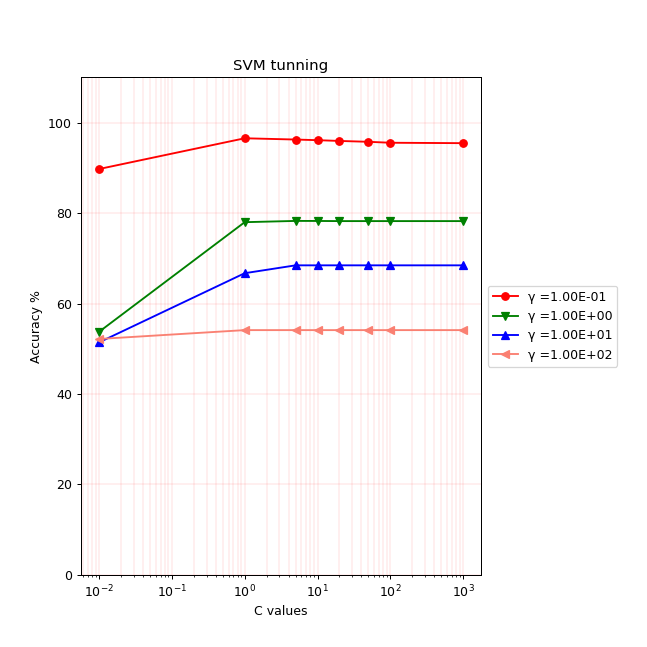

In [67]:
f, ax = plt.subplots(num=13,figsize=(8, 8))

markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h']
colors = ['r', 'g', 'b', 'salmon', 'lime', 'purple', 'cyan', 'gold', 'peru', 'gray']

for i in range(ng):
    #plt.semilogx(c_list, svm_mean.T)

    lbl ='\N{greek small letter gamma}'+' =' + str('%.2E' % Decimal(gamma_list[i]))
    #plt.semilogx(c_list, svm_mean[i,:], marker=markers[i], color=colors[i],label=lbl)
    plt.plot(c_list, svm_mean[i,:], marker=markers[i], color=colors[i],label=lbl)

plt.legend(str(gamma_list[:]))
plt.xlabel('C values')
plt.ylabel('Accuracy %')
plt.title('SVM tunning')
plt.ylim(0,110)
plt.xscale('log')
plt.grid(b=None, which='both', axis='both', color='r', linestyle='-', linewidth=.1)


# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

* Defining SVM 

In [68]:
SVM = SVC(C=1, gamma=0.1)
              
StratKfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

score_svm       = cross_val_score(SVM, X_features, y_target, cv=StratKfold)
score_svm_mean_ = score_svm.mean()*100
score_svm_std_  = score_svm.std()*100

print('Mean accuracy %.2f%% (std deviation %.2f%%)' % (score_svm_mean_, score_svm_std_))

Mean accuracy 94.73% (std deviation 0.55%)


## SUMMARY

In [69]:
table = [["Decision Tree without PCA",round(score_tree.mean()*100,2),round(score_tree.std()*100,2)],
         ["Decision Tree with PCA",round(score_tree_pca.mean()*100,2),round(score_tree_pca.std()*100,2)],
         ["Random Forest",round(score_forest.mean()*100,2),round(score_forest.std()*100,2)],
         ["KNN",round(score_knn.mean()*100,2) , round(score_knn.std()*100,2)],
         ["Logistic Regression with PCA", round(score_lr.mean()*100,2) , round(score_lr.std()*100,2)],
         ['SVM',round(score_svm.mean()*100,2) , round(score_svm.std()*100,2)]]

display(HTML(tabulate.tabulate(table, headers=["Model","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

In [75]:
history clear